In [4]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

In [3]:
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [8]:
# 生成距离矩阵
# pdist计算两两之间的距离， squareform生成对称阵
distMat = squareform(pdist(df, metric='euclidean'))
row_dist = pd.DataFrame(distMat, columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [14]:
from scipy.cluster.hierarchy import linkage
# 输入到 linkage的可以是： ①距离矩阵上三角（pdist生成的结果）；②原始数据矩阵
# note： 不可以将 squareform生成的距离矩阵直接输入进去
# 生成关联矩阵（linkage matrix）
# wrong method ！!
print(linkage(row_dist, method='complete', metric='euclidean'))
print('\n')
# correct method !!
print(linkage(pdist(df, metric='euclidean'), method='complete'))
print('\n')
# correct method !!
print(linkage(df.values, method='complete', metric='euclidean'))

[[  0.           4.           6.52197264   2.        ]
 [  1.           2.           6.72960262   2.        ]
 [  3.           5.           8.53924727   3.        ]
 [  6.           7.          12.44482356   5.        ]]


[[ 0.          4.          3.83539555  2.        ]
 [ 1.          2.          4.34707339  2.        ]
 [ 3.          5.          5.89988504  3.        ]
 [ 6.          7.          8.31659367  5.        ]]


[[ 0.          4.          3.83539555  2.        ]
 [ 1.          2.          4.34707339  2.        ]
 [ 3.          5.          5.89988504  3.        ]
 [ 6.          7.          8.31659367  5.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


In [18]:
# 生成 linkage矩阵， 转化成数据框， 并绘树状图
row_clusters = linkage(df.values, method='complete', metric='euclidean')
hierarchy_df = pd.DataFrame(row_clusters, 
                            columns=['row_label 1', 'row_label 2', 'dist', 'num of items'], 
                            index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

hierarchy_df.head()

,row_label 1,row_label 2,dist,num of items
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


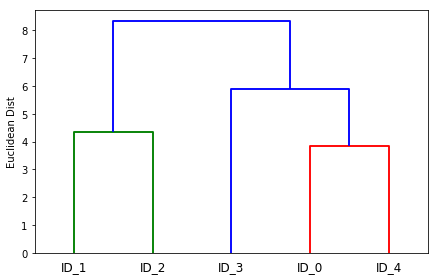

In [20]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Dist')
plt.show()

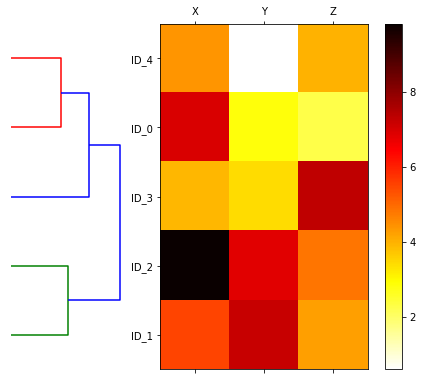

In [39]:
# 绘制热度图
fig = plt.figure(figsize=(8, 8))
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='right')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [41]:
# 使用 sklearn进行层次聚类
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels : %s' % labels)

Cluster labels : [0 1 1 0 0]
